In [4]:
import tensorflow as tf
import keras_preprocessing
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator


>shows the first image in grayscale

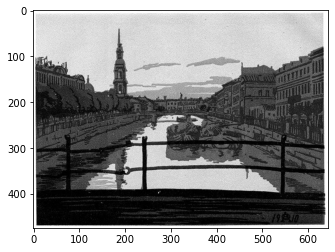

In [5]:
Train_dir='CV/train_set'
CATEGORIES = ["drawings", "engraving", "iconography", "painting","sculpture"]
for category in CATEGORIES: 
    path = os.path.join(Train_dir,category)  
    for img in os.listdir(path):  
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  
        plt.imshow(img_array, cmap='gray') 
        plt.show()  

        break  
    break  


>Constructing the training set and validation set using ImageDataGenerator

In [6]:
training_datagen = ImageDataGenerator(validation_split=0.2, rescale = 1./255,
	   rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest'
     )

training_generator=training_datagen.flow_from_directory(
	'CV/train_set',
    subset='training',
	target_size=(150,150),
	class_mode='categorical',
  batch_size=128
)
 
 
validation_generator = training_datagen.flow_from_directory(
	'CV/train_set',
     subset='validation',
	target_size=(150,150),
	class_mode='categorical',
  batch_size=32
)
print(len(training_generator))



Found 6178 images belonging to 5 classes.
Found 1542 images belonging to 5 classes.
49


>Model definition below


The dropout layer was removed as it had negligible effect on accuracy

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5, activation="softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 41472)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               5308544   
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 6

In [8]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [9]:
history = model.fit(training_generator, epochs=30, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)


  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 20 steps, validate for 3 steps
Epoch 1/30
20/20 [==============================] - 50s 2s/step - loss: 2.4131 - accuracy: 0.3309 - val_loss: 1.0634 - val_accuracy: 0.6354
Epoch 2/30
20/20 [==============================] - 46s 2s/step - loss: 1.3341 - accuracy: 0.4703 - val_loss: 1.4371 - val_accuracy: 0.3438
Epoch 3/30
20/20 [==============================] - 44s 2s/step - loss: 1.1403 - accuracy: 0.5474 - val_loss: 0.8252 - val_accuracy: 0.6667
Epoch 4/30
20/20 [==============================] - 44s 2s/step - loss: 1.0076 - accuracy: 0.6383 - val_loss: 1.3718 - val_accuracy: 0.4583
Epoch 5/30
20/20 [==============================] - 45s 2s/step - loss: 0.9779 - accuracy: 0.6344 - val_loss: 0.7702 - val_accuracy: 0.7083
Epoch 6/30
20/20 [==============================] - 44s 2s/step - loss: 0.8848 - accuracy: 0.6840 - val_loss: 0.5740 - val_accuracy: 0.7917
Epoch 7/30
20/20 [==============================] - 44s 2s/step - los

>Getting the test set from "CV/test_set" folder

In [10]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_directory('CV',
                              classes=['test_set'],
                              target_size=(150, 150),
                                  color_mode="rgb",
                               batch_size=32,
                              class_mode=None,
                              shuffle=False
                            )



Found 798 images belonging to 1 classes.


>test_generator.reset to get outputs in the same order

In [11]:
test_generator.reset()

In [12]:
pred=model.predict_generator(test_generator,verbose=1,steps=798/32)

Instructions for updating:
Please use Model.predict, which supports generators.
25/24 [==============================] - 7s 290ms/step


In [13]:
print(pred)

[[1.9802600e-03 2.7835154e-04 4.6165338e-01 5.1683575e-01 1.9252304e-02]
 [1.3680457e-07 1.7749125e-08 1.9522723e-09 9.9999988e-01 3.7435189e-08]
 [8.0155485e-05 7.7975019e-06 6.5828179e-05 9.9946529e-01 3.8093014e-04]
 ...
 [7.3914301e-01 2.4921870e-01 7.0505601e-04 3.8099760e-04 1.0552176e-02]
 [1.4127567e-01 8.2323027e-01 2.1965371e-02 9.3291368e-04 1.2595843e-02]
 [3.5625416e-01 6.3870782e-01 2.3402038e-03 5.6111591e-04 2.1366484e-03]]


In [14]:
type(test_generator)
print(pred.shape)

(798, 5)


In [15]:
predicted_class_indices=np.argmax(pred,axis=1)    

#gives index of the largest value in each array

In [16]:
print(predicted_class_indices.shape)

(798,)


In [17]:
labels = (training_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

#reversing the labels and their corresponding indices to get the class type in text

In [18]:
print(predictions)

['painting', 'painting', 'painting', 'painting', 'painting', 'painting', 'painting', 'painting', 'painting', 'painting', 'painting', 'painting', 'painting', 'painting', 'painting', 'painting', 'painting', 'painting', 'painting', 'painting', 'painting', 'painting', 'painting', 'painting', 'painting', 'painting', 'painting', 'painting', 'iconography', 'painting', 'iconography', 'painting', 'painting', 'painting', 'painting', 'painting', 'painting', 'painting', 'painting', 'painting', 'painting', 'painting', 'painting', 'painting', 'painting', 'iconography', 'painting', 'painting', 'painting', 'painting', 'painting', 'painting', 'painting', 'painting', 'painting', 'painting', 'painting', 'painting', 'painting', 'painting', 'painting', 'painting', 'painting', 'painting', 'painting', 'painting', 'painting', 'painting', 'painting', 'painting', 'painting', 'painting', 'painting', 'painting', 'painting', 'painting', 'painting', 'painting', 'painting', 'painting', 'painting', 'painting', 'paint

In [15]:
#for i in range(len(predictions)):
#    if predictions[i]=='engraving':
#        predictions[i]=0
#    elif predictions[i]=='iconography':
#        predictions[i]=1
#    elif predictions[i]=='painting':
#        predictions[i]=2 
#   elif predictions[i]=='sculpture':
#        predictions[i]=3 
#    elif predictions[i]=='drawings':
#        predictions[i]=4
        
#assigned indices to the classes as per the instructions given in the original google doc

#Update:Not changing into indices due to change in submission instructions

In [ ]:
#print(predictions)

>getting filenames from test generator and storing them in a list

In [19]:
filenames=test_generator.filenames
for i in range(len(filenames)):
    filenames[i]=os.path.basename(filenames[i])


>storing corresponding filenames and predictions in a dictionary

In [20]:
di={}
for i in range(len(filenames)):
    di[filenames[i]]=predictions[i]


In [21]:
data = pd.read_csv('CV/submission.csv')
x = data["id"]
pred=[]
for img in x:
    pred.append(di[img])
data["label"]=pred
    

In [22]:
data.to_csv("submission.csv", index = False)